In [58]:
import pandas as pd
import requests
import os
import tweepy
import json
import time
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Gather

In [59]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [60]:
#write the tab separated file image-predictions using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image-predictions.tsv', 'wb').write(response.content)


335079

In [61]:
#read the tab separated file image-predictions using read_csv methos 
df_img_predict= pd.read_csv('image-predictions.tsv', sep='\t')
df_img_predict.shape[0]

2075

In [62]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [ ]:
start_time = time.time()
missing_counter=0
with open("tweet_json.txt", "w") as file:
    for tweet_id in df_twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
            file.write(json.dumps(tweet._json)+"\n")
        except Exception as e:
            missing_counter=missing_counter+1
            print(missing_counter)
            print("tweet id "+str(tweet_id)+" not found"+str(e))
end_time = time.time()
print ("total time to parse all the tweets {} seconds".format(end_time-start_time))

In [64]:
additional_attr=[]
with open('tweet_json.txt','r') as file:
    for line in file:
        json_data = json.loads(line)
        additional_attr.append({'tweet_id':json_data['id'], 'favorites':json_data['favorite_count'],
                               'retweets':json_data['retweet_count']})
df_tweet_additional_attr = pd.DataFrame(additional_attr, columns=['tweet_id', 'favorites', 'retweets'])

In [65]:
df_tweet_additional_attr.head()

,tweet_id,favorites,retweets
0,892420643555336193,36184,7703
1,892177421306343426,31214,5697
2,891815181378084864,23500,3777
3,891689557279858688,39485,7869
4,891327558926688256,37676,8479


## Assess

In [66]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [67]:
df_twitter_archive.duplicated().sum()

0

In [68]:
df_img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [69]:
df_img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
df_img_predict.duplicated().sum()

0

In [71]:

df_tweet_additional_attr.head()

,tweet_id,favorites,retweets
0,892420643555336193,36184,7703
1,892177421306343426,31214,5697
2,891815181378084864,23500,3777
3,891689557279858688,39485,7869
4,891327558926688256,37676,8479


In [72]:
df_tweet_additional_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [73]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [74]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Bailey         7
Buddy          7
an             7
Toby           7
Koda           6
Dave           6
Oscar          6
Leo            6
Scout          6
Bella          6
Milo           6
Jack           6
Stanley        6
Rusty          6
Jax            6
George         5
            ... 
Birf           1
Kirk           1
Major          1
Holly          1
Goose          1
Obi            1
Diogi          1
Jed            1
Laika          1
Strudel        1
Bloop          1
Julius         1
Brutus         1
Maxwell        1
Champ          1
Crouton        1
his            1
Spark          1
Autumn         1
Keet           1
Snoop          1
Antony         1
Sweets         1
Tedrick        1
Chesney        1
Billl          1
Jeffri         1
Harry         

### Quality

### df_twitter_archive table
1. source and expanded_urls columns are not required for this analysis 
2. Majority of the values in these columns are null: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_user_id
3. tweet_id 786709082849828864 has an incorrectly extracted rating (the value should be 9.75 but 75 was recorded
4. There are very high numerator ratings that will skew any analysis (99% of the Numerator ratings <= 14)
5. Denominator ratings different than 10
6. Dog stages are object datatypes rather than category 
7. timestamp field is object rather than datetime
8. Invalid names such as "a", "an", "the" (all starting with lowercase)
9. Usage of None rather than NaN for name field 


### Tidiness
1. Rating numerator and Rating denominator should be combined into a single  column 
2. Dog stages (doggo, floofer, pupper, puppo) should be combined into a single coulmn 
3. Dog breed and image URL from img_predict should be part of df_twitter_archive_table
4. Favorites and retweets count from df_tweet_additional_attr table should be part of df_twitter_archive_table


In [75]:
#Copying the tables into another table over which cleaning operations will be performed

df_twitter_archive_clean = df_twitter_archive
df_tweet_additional_attr_clean = df_tweet_additional_attr
df_img_predict_clean = df_img_predict

## Clean

### Quality

#### 1. source and expanded_urls columns are not required for this analysis

#### Define
Drop the source column from df_twitter_archive table

#### Code

In [76]:
df_twitter_archive_clean.drop(columns =['source', 'expanded_urls'], inplace=True)

#### Test

In [77]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 276.2+ KB


#### 2. Majority of the values in these columns are null: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_user_id

#### Define
Drop the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_user_id and retweeted_status_timestamp as they are not releant to the analysis

#### Code

In [78]:
df_twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [79]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


#### 3. tweet_id 786709082849828864 has an incorrectly extracted rating (the value should be 9.75 but 75 was recorded)


#### Define
Replace the numerator for tweet id 786709082849828864 with 9


#### Code

In [80]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9

#### Test

In [81]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id']==786709082849828864]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",9,10,Logan,None,None,None,None


#### 4. There are very high numerator ratings that will skew any analysis (99% of the Numerator ratings <= 14)


#### Define
Drop the rows where rating_numerator > 14

#### Code

In [82]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator'] <= 14]

#### Test

In [83]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator'] > 14]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 5. Denominator ratings different than 10

#### Define
Replace all the ratings_denominators with 10 for consistency

#### Code

In [84]:
df_twitter_archive_clean['rating_denominator']=10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [85]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator']!=10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness 

#### 1. Rating numerator and Rating denominator should be combined into a single column called Rating


#### Define
Divide rating_numerator with rating_denominator to get the overall rating. Then drop the rating_numerator and rating_denominator columns 

#### Code

In [86]:
df_twitter_archive_clean['rating']=df_twitter_archive_clean['rating_numerator']/df_twitter_archive_clean['rating_denominator']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_twitter_archive_clean.drop(columns =['rating_numerator', 'rating_denominator'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test


In [88]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id     2329 non-null int64
timestamp    2329 non-null object
text         2329 non-null object
name         2329 non-null object
doggo        2329 non-null object
floofer      2329 non-null object
pupper       2329 non-null object
puppo        2329 non-null object
rating       2329 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 182.0+ KB


#### 2. Dog stages (doggo, floofer, pupper, puppo) should be combined into a single coulmn

#### Define
Use regex to extract dog stage from the text to store in a new column, and drop the columns: "doggo" , "floofer", "pupper" and "puppo" 

#### Code

In [89]:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,1.2,NaN


In [91]:
df_twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test


In [92]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2329 non-null int64
timestamp    2329 non-null object
text         2329 non-null object
name         2329 non-null object
rating       2329 non-null float64
dog_stage    391 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 127.4+ KB


### Quality

#### 6. Dog stages are object datatypes rather than category 

#### Define
Change the datatype of dog_stage field from object to category

#### Code

In [93]:
df_twitter_archive_clean["dog_stage"] = df_twitter_archive_clean["dog_stage"].astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test


In [94]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2329 non-null int64
timestamp    2329 non-null object
text         2329 non-null object
name         2329 non-null object
rating       2329 non-null float64
dog_stage    391 non-null category
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 111.6+ KB


####  7. timestamp variable is object rather than datetime


#### Define
Change the datatype for timestamp from object to datetime 

#### Code


In [95]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [96]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2329 non-null int64
timestamp    2329 non-null datetime64[ns]
text         2329 non-null object
name         2329 non-null object
rating       2329 non-null float64
dog_stage    391 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 111.6+ KB


#### 8. Invalid names such as "a", "an", "the" (all starting with lowercase)


#### Define
Replace the invalid names with NaN

#### Code


In [97]:
invalid_name_mask = df_twitter_archive_clean.name.str.islower()
df_twitter_archive_clean.loc[invalid_name_mask, 'name'] = np.nan

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [98]:
df_twitter_archive_clean.name.value_counts()

None         725
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Bailey         7
Daisy          7
Toby           7
Buddy          7
Koda           6
Rusty          6
Jack           6
Oscar          6
Dave           6
Scout          6
Leo            6
Jax            6
Stanley        6
Milo           6
Bella          6
Larry          5
George         5
Gus            5
Bentley        5
            ... 
Bradley        1
Lilah          1
Birf           1
Kirk           1
Major          1
Holly          1
Laika          1
Shnuggles      1
Kial           1
Harry          1
Tayzie         1
Derby          1
Maks           1
Bloop          1
Julius         1
Brutus         1
Maxwell        1
Mabel          1
Crouton        1
Spark          1
Autumn         1
Keet           1
Snoop          1
Antony         1
Sweets         1
Tedrick        1
Chesney        1
Billl         

#### 9. Usage of None rather than NaN for name field 

#### Define 
Replace None with NaN

#### Code

In [99]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['name'] == 'None', 'name'] = np.NaN

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [100]:
df_twitter_archive_clean.name.value_counts()

Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
Daisy         7
Bailey        7
Toby          7
Buddy         7
Rusty         6
Oscar         6
Jack          6
Koda          6
Scout         6
Dave          6
Leo           6
Stanley       6
Jax           6
Milo          6
Bella         6
Larry         5
Gus           5
Bentley       5
George        5
Louis         5
             ..
Bradley       1
Lilah         1
Birf          1
Kirk          1
Major         1
Holly         1
Laika         1
Shnuggles     1
Steve         1
Harry         1
Kial          1
Tayzie        1
Derby         1
Maks          1
Bloop         1
Julius        1
Brutus        1
Maxwell       1
Mabel         1
Crouton       1
Spark         1
Keet          1
Snoop         1
Antony        1
Sweets        1
Tedrick       1
Chesney       1
Billl         1
Jeffri        1
Halo          1
Name: name, Length: 930,

### Tidiness

#### 3. Dog breed and image URL from img_predict should be part of df_twitter_archive_table

#### Define
Iterate through each of the rows and pick the first value predicted to be dog (i.e. p1_dog is True) as dog_breed. Drop the column not required for analysis: 'img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_dog', 'p3_conf'. Finally, merge the dataset with df_twitter_archive_clean


#### Code

In [101]:
#Function to go through each of the row in the dataframe and return the first value where p1_dog is True 
# i.e. where the deep learning algorithm has predicted that the image is that of a dog
def predict_breed(row):
    if row.p1_dog:
        return row.p1
    elif row.p2_dog:
        return row.p2
    elif row.p3_dog:
        return row.p3
    else:
        return ""

In [102]:
#Calling the predict_breed function for each of the rows, and storing the result in dog_breed column
df_img_predict_clean['dog_breed'] = df_img_predict_clean.apply(lambda row: predict_breed(row),axis=1)

In [103]:
#dropping the columns that are not required anymore for the analysis (as we have already derived the dog breed)
df_img_predict_clean.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_dog', 'p3_conf'], inplace=True)

In [104]:
# Merging the cleaned image prediction data into twitter archive table
df_twitter_archive_clean = pd.merge(df_img_predict_clean,df_twitter_archive_clean, on='tweet_id')

#### Test

In [105]:
df_twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 8 columns):
tweet_id     2056 non-null int64
jpg_url      2056 non-null object
dog_breed    2056 non-null object
timestamp    2056 non-null datetime64[ns]
text         2056 non-null object
name         1393 non-null object
rating       2056 non-null float64
dog_stage    330 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.7+ KB


#### 4. Favorites and retweets count from df_tweet_additional_attr table should be part of df_twitter_archive_table

#### Define
Merge additional attribute table with twitter archive table to make favorites and retweets part of the twitter archive table

#### Code

In [106]:
df_twitter_archive_clean = pd.merge(df_tweet_additional_attr_clean,df_twitter_archive_clean, on='tweet_id')

#### Test

In [107]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2039
Data columns (total 10 columns):
tweet_id     2040 non-null int64
favorites    2040 non-null int64
retweets     2040 non-null int64
jpg_url      2040 non-null object
dog_breed    2040 non-null object
timestamp    2040 non-null datetime64[ns]
text         2040 non-null object
name         1382 non-null object
rating       2040 non-null float64
dog_stage    326 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 161.6+ KB


In [108]:
# Writing the cleaned and merged file to twitter_archive_master.csv file 
df_twitter_archive_clean.to_csv("twitter_archive_master.csv", index=False)

### Analysis required for the external report

In [128]:
#most common breed
df_twitter_archive_clean.dog_breed.mode()

0    
dtype: object

In [110]:
#most popular names
df_twitter_archive_clean.name.mode()

0    Charlie
1     Cooper
2     Oliver
3      Penny
4     Tucker
dtype: object

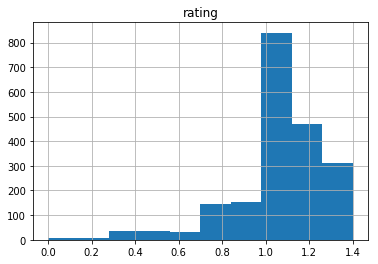

In [111]:
# average rating  given to the tweets (on a scale of 0 to 1.4)
df_twitter_archive_clean.hist('rating');

#### Creating a word cloud of dog names

In [124]:
#extracting a dataframe without NaN values

df_twitter_archive_clean_name = df_twitter_archive_clean[df_twitter_archive_clean.name.notnull()]

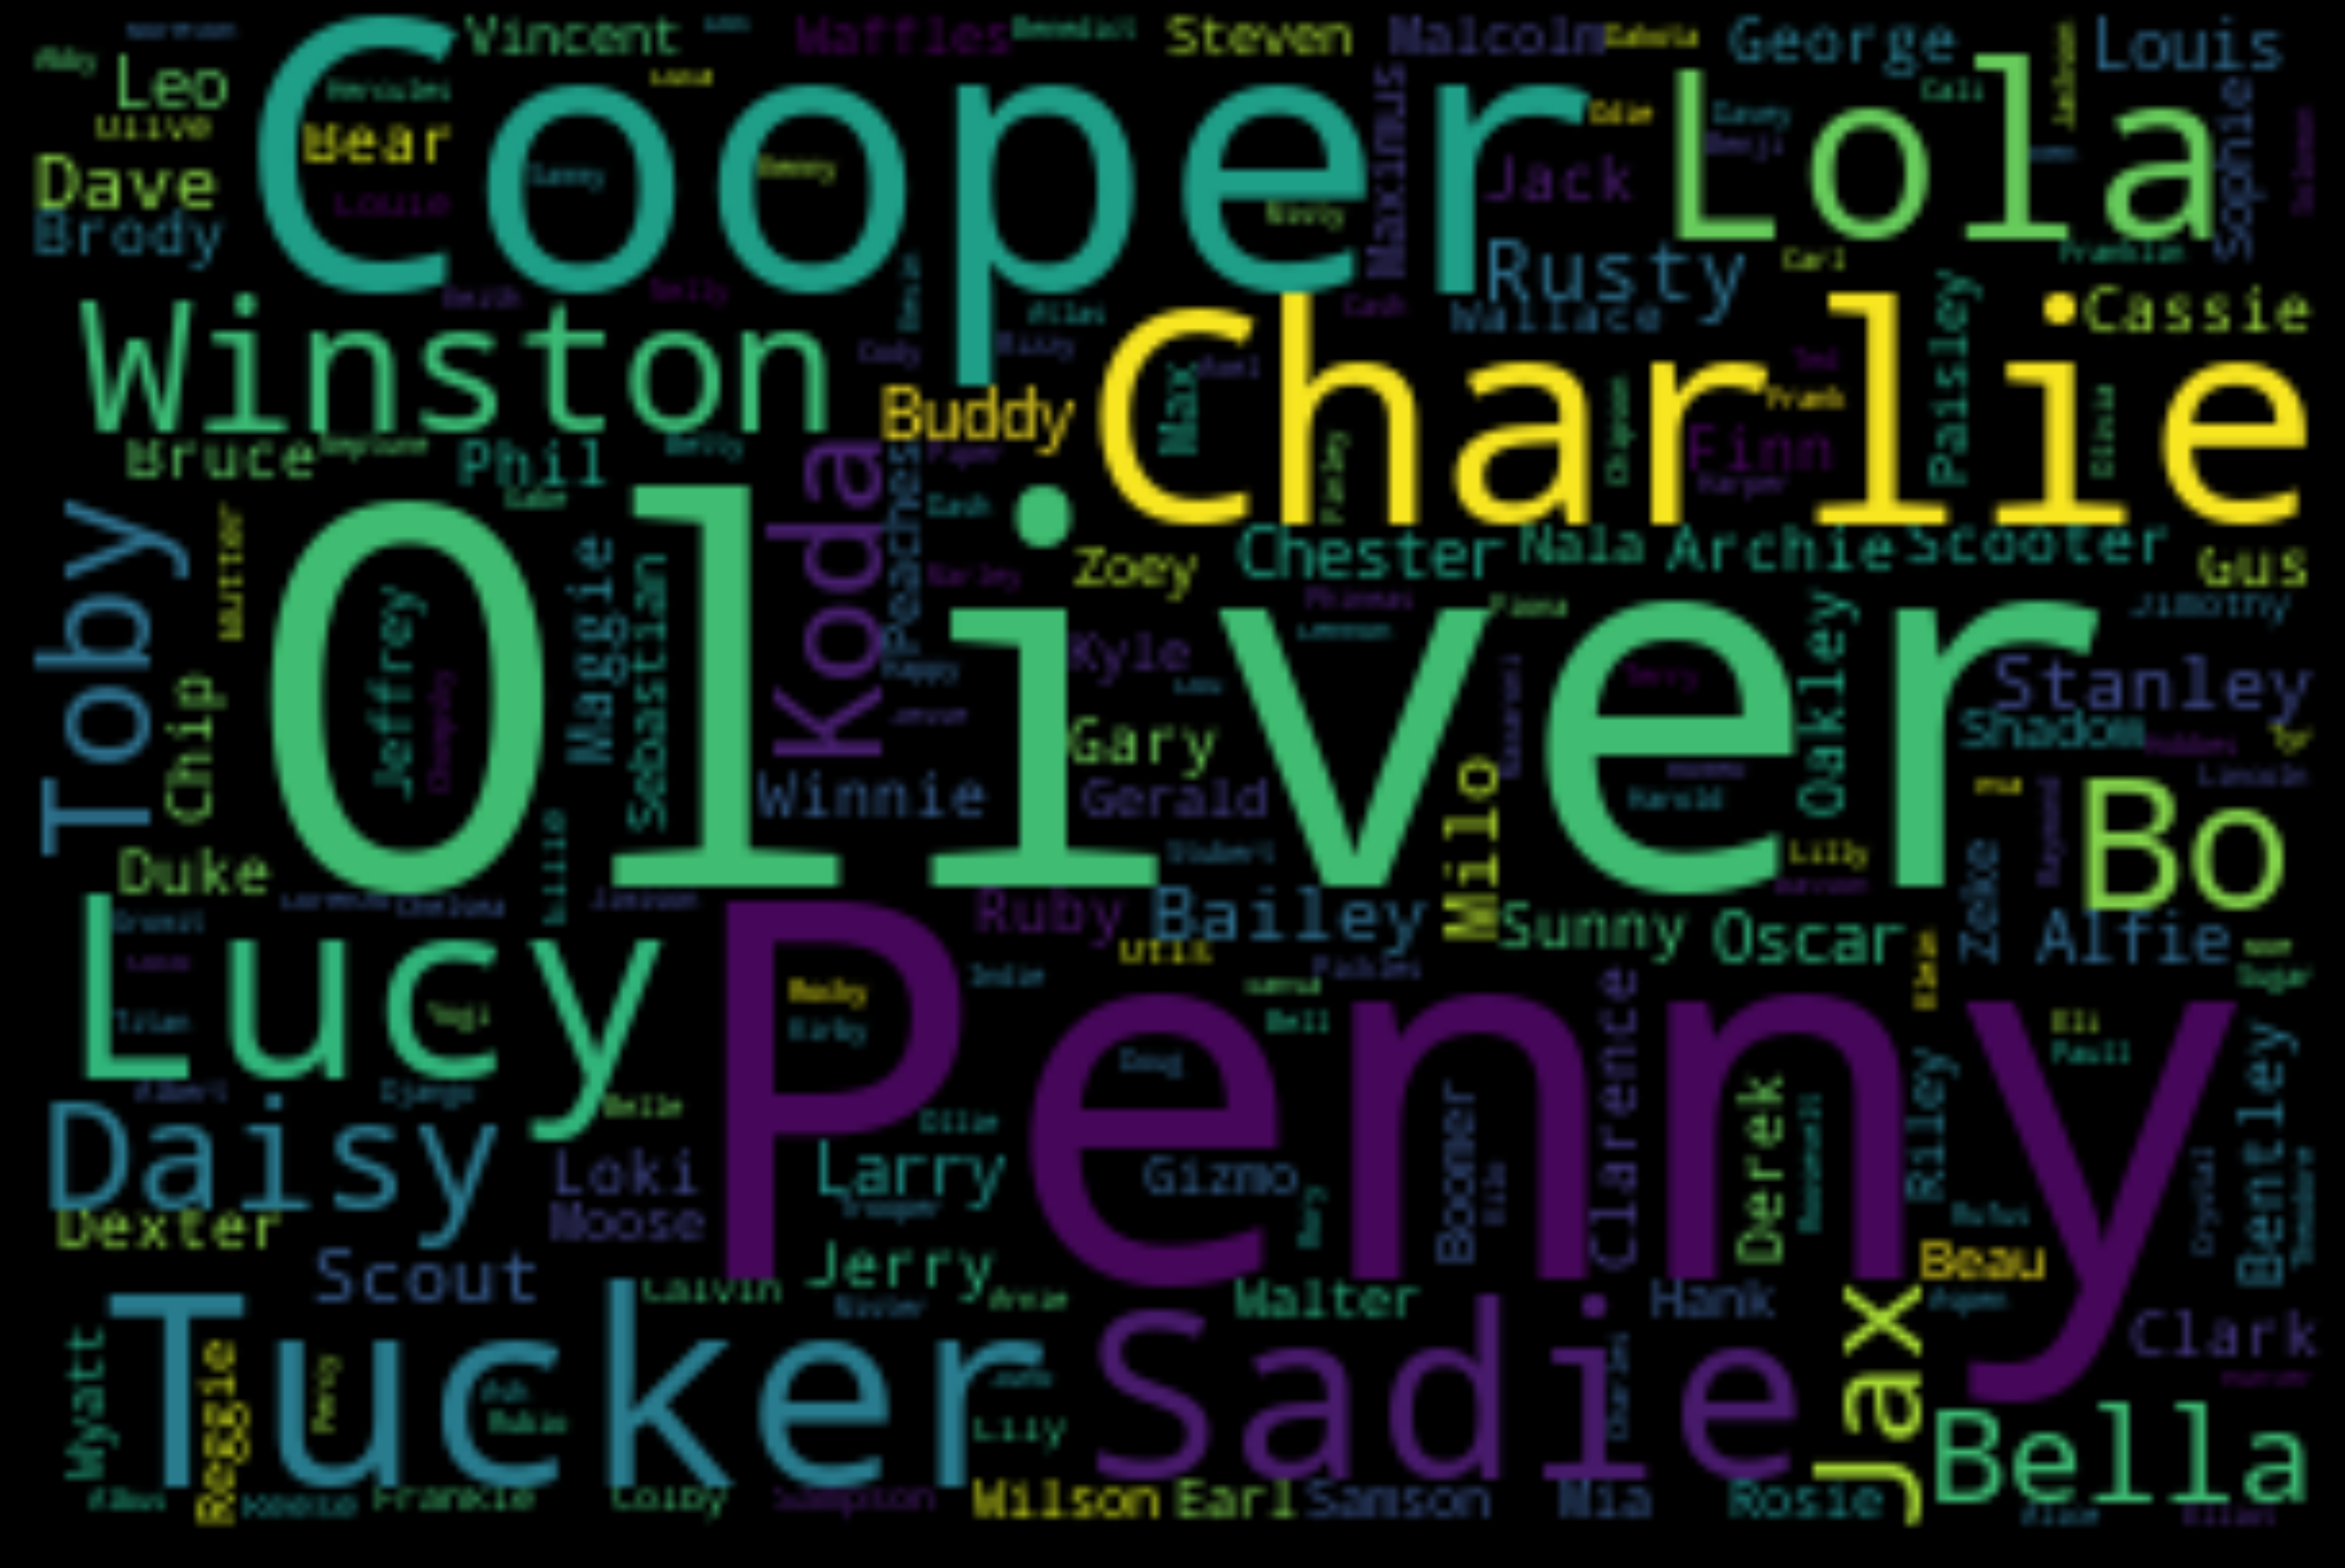

In [126]:
dog_name = " ".join(name for name in df_twitter_archive_clean_name.name)
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(dog_name))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()